In [6]:
import spacy, benepar
#benepar.download('benepar_en3')

In [7]:
import numpy as np
import time

In [8]:
nlp = spacy.load('en_core_web_md')

In [9]:
if spacy.__version__.startswith('2'):
    nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
else:
    nlp.add_pipe("benepar", config={"model": "benepar_en3"})

In [10]:
import sys
sys.path.append('../')
from FullParser.ClauseParser import ClauseParser
import pandas as pd

In [11]:
parser = ClauseParser()

In [12]:
def read_file(file_path):
    with open(file_path, 'r', encoding = 'utf-8') as f:
        for line in f:
            yield line

In [13]:
dolma_path = "../Datasets/dolma/dolma/dolma_text/"
current_file = "v1_5r2_sample-0005.txt"

In [ ]:
t = time.time()
times = []
line_count = 1
ECs = []
for line in read_file(dolma_path+current_file):
    sline = line.strip('\n')
    if len(line) <100 :
        try:
            doc = nlp(sline)
            for sent in doc.sents:
                parse = parser.parse_clauses(sent)
                if parse != []:
                    # print(f'Line {line_count} has an embedded clause!')
                    ECs.append(parse)
        except Exception as e:
            #print(f"Error encountered while processing line {line_count}: {sline}")
            print(e)
            pass  # Do nothing, continue to next line
    line_count+=1
    if line_count % 1000 == 0:
        print(f'Time to parse 1000 entries: {time.time()-t}')
        times.append(time.time()-t)
        t = time.time()

In [58]:
len(ECs)/(np.sum(times)/60/60)

15562

In [45]:
1000*(np.sum(times)/60/60)

0.15009639435610203

In [92]:
predicates = []
for entry in ECs:
    for clause in entry:
        if not clause['predicate']:
            continue
        pred_string = ''
        for pred in clause['predicate']:
            pred_string += pred['str']
        predicates.append(pred_string)

In [85]:
import matplotlib.pyplot as plt

In [96]:
np.unique(predicates, return_counts=rue)

(array(["'m", "'mLonesome", "'maaaah", ..., '’s’vebeentryingexplainto',
        '’s’vecaughtupwith', '’vebeen'], dtype='<U56'),
 array([2, 1, 1, ..., 1, 1, 1]))

'turn'

<BarContainer object of 6607 artists>

/opt/homebrew/Caskroom/miniconda/base/envs/benepar_env/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 127815 (\N{GRAPES}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/benepar_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127815 (\N{GRAPES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


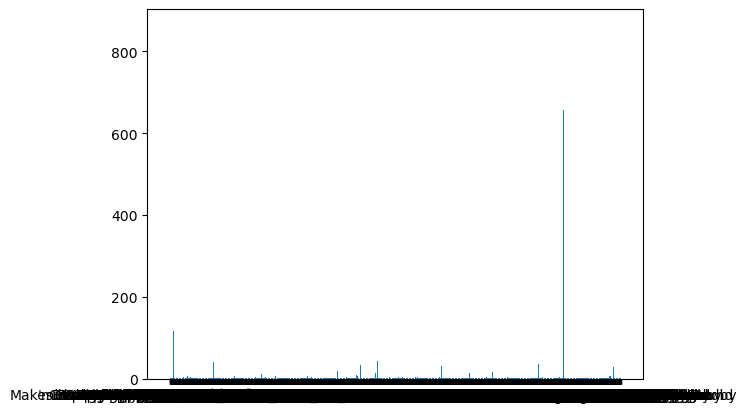

In [95]:
(lambda x: plt.bar(x[0],x[1]))(np.unique(predicates, return_counts=True))

(array([ 1.,  0.,  1.,  2.,  1.,  0.,  3.,  1.,  1.,  1.,  6.,  6.,  5.,
         8.,  9., 14., 13., 23., 12., 16., 22., 26., 22., 27., 23., 29.,
        29., 23., 21., 19., 25., 13., 26., 26., 14., 11., 16., 11., 13.,
         9., 13., 11.,  5.,  8.,  8.,  6.,  2.,  2.,  5.,  4.,  3.,  2.,
         4.,  1.,  1.,  3.,  2.,  3.,  0.,  1.,  0.,  1.,  1.,  2.,  0.,
         1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 5.7091372 ,  5.86256789,  6.01599858,  6.16942927,  6.32285995,
         6.47629064,  6.62972133,  6.78315202,  6.93658271,  7.0900134 ,
         7.24344409,  7.39687477,  7.55030546,  7.70373615,  7.85716684,
         8.01059753,  8.16402822,  8.3174589 ,  8.47088959,  8.62432028,
         8.77775097,  8.93118166,  9.08461235,  9.23804303,  9.39147372,
         9.54490441,  9.6983351 ,  9.85176579, 10.00519648, 10.158627

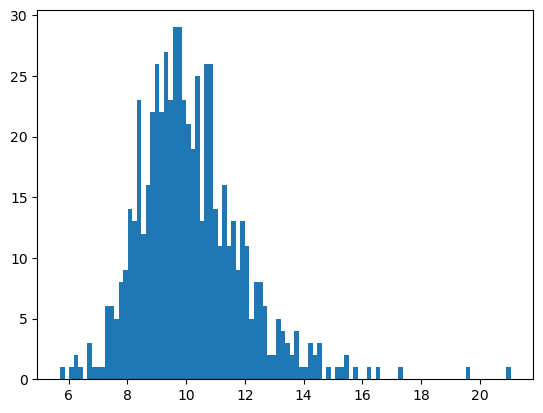

In [41]:
plt.hist(times,bins=100)